# Build Classification Models

In [1]:
# Import cleaned cuisines file
import pandas as pd
cuisines_df = pd.read_csv("../data/cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2]:
#  import several more libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np

In [3]:
# Divide the X and y coordinates into two dataframes for training. cuisine can be the labels dataframe
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()


0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [4]:
# Drop that Unnamed: 0 column and the cuisine column, calling drop(). Save the rest of the data as trainable features

cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# ML Cheat sheet

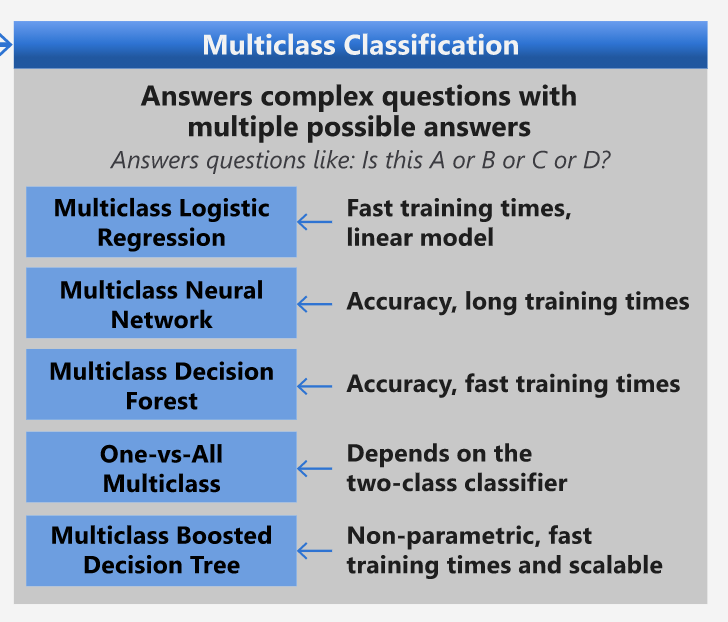


In [5]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)



In [6]:
#  Use LogisticRegression with a multiclass setting and the liblinear solver to train
# The accuracy is good at over 80%!!!

lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7848206839032527


In [7]:
# see this model in action by testing one row of data (#50)
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['butter', 'vegetable_oil'], dtype='object')
cuisine: japanese


In [9]:
# Check the accuracy of this prediction

test= X_test.iloc[100].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
thai,0.943610
indian,0.052033
chinese,0.002977
japanese,0.001365
korean,0.000015


In [ ]:
# Print a classification report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
